In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import os
import seaborn as sns

In [5]:
def create_combined_data(experiments):
    steps_set = set([0, 100000])
    for df in experiments:
        steps_set.update(df['Step'].tolist())
    
    list_of_steps = sorted(list(steps_set))
    data_for_exp = []
    intepolated_dfs = []
    for df in experiments:
        f = interp1d(df['Step'].tolist(), df['Value'].tolist(), fill_value="extrapolate", kind="previous")
        new_values = f(list_of_steps)
        combined_data = [[list_of_steps[i], new_values[i]] for i in range(len(list_of_steps))]
        df_np_arr = np.array(combined_data)
        column_values = ['Step', 'Value']
        df = pd.DataFrame(data = df_np_arr, columns = column_values)
        intepolated_dfs.append(df)
    return intepolated_dfs   

           Step  Success      cat  run
0           0.0      0.0     DREF    1
1         143.0      0.0     DREF    1
2         146.0      0.0     DREF    1
3         162.0      0.0     DREF    1
4         168.0      0.0     DREF    1
...         ...      ...      ...  ...
49435   99848.0  37850.0  EF-100%    5
49436   99881.0  37950.0  EF-100%    5
49437   99885.0  37950.0  EF-100%    5
49438   99976.0  37950.0  EF-100%    5
49439  100000.0  37950.0  EF-100%    5

[49440 rows x 4 columns]


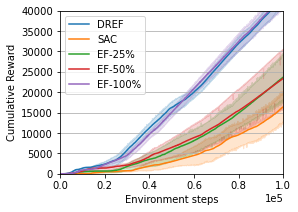

In [6]:
# BallBasket 

experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    },
    {
        "cat": "DREF",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3.csv",
    },
    {
        "cat": "DREF",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4.csv",
    },
    {
        "cat": "DREF",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_5.csv",
    },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_5.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(0, 0.4e5)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Cumulative Reward")
ax.grid(visible=True, axis='y')
fig.savefig("BallBasketTaskRewards.pdf", bbox_inches='tight')


           Step      Success      cat  run
0           0.0     0.000000     DREF    1
1         772.0     0.000000     DREF    1
2         995.0     0.000000     DREF    1
3        1106.0     0.000000     DREF    1
4        1615.0     0.000000     DREF    1
...         ...          ...      ...  ...
71820   99974.0  8434.999995  EF-100%    5
71821   99982.0  8434.999995  EF-100%    5
71822   99988.0  8434.999995  EF-100%    5
71823   99996.0  8444.999969  EF-100%    5
71824  100000.0  8444.999969  EF-100%    5

[71825 rows x 4 columns]


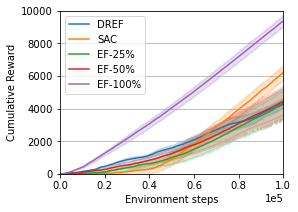

In [7]:
#Reaching 

experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    },
    {
        "cat": "DREF",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3.csv",
    },
    {
        "cat": "DREF",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4.csv",
    },
    {
        "cat": "DREF",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_5.csv",
    },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_5.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(0, 1.0e4)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Cumulative Reward")
ax.grid(visible=True, axis='y')
fig.savefig("ReachingTaskRewards.pdf", bbox_inches='tight')


           Step       Success      cat  run
0           0.0      0.000000     DREF    1
1         365.0      0.000000     DREF    1
2         412.0      0.000000     DREF    1
3         456.0      0.000000     DREF    1
4         531.0      0.000000     DREF    1
...         ...           ...      ...  ...
17160  149337.0  27719.106865  EF-100%    5
17161  149696.0  27719.106865  EF-100%    5
17162  149760.0  27719.106865  EF-100%    5
17163  149788.0  27976.056168  EF-100%    5
17164  149991.0  27976.056168  EF-100%    5

[17165 rows x 4 columns]


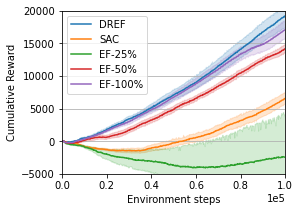

In [8]:
#Lunar Lander 

experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    },
    {
        "cat": "DREF",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3.csv",
    },
    {
        "cat": "DREF",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4.csv",
    },
    {
        "cat": "DREF",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_5.csv",
    },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_5.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
        
# print(dfs)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(-5e3, 2.0e4)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Cumulative Reward")
ax.grid(visible=True, axis='y')
fig.savefig("LunarLanderTaskRewards.pdf", bbox_inches='tight')


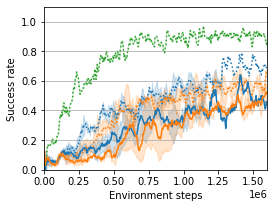

In [76]:
experiments = [
    {
        "cat": "PM: RGB-D + SG",
        "run": 1,
        "csv": "./sg_preseed/run-relational_search_sg_all_no_goal_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG",
        "run": 2,
        "csv": "./sg_preseed/run-relational_search_sg_preseed_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 1,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 2,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_2_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 1,
        "csv": "./fasg_preseed/run-search_fixed_attention_mj_3_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./fasg_preseed/run-search_fixed_attention_mj_3_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df_preseed = pd.concat(dfs, ignore_index=True)

experiments = [
    {
        "cat": "RGB-D + SG",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df_preseed, x="Step", y="Success", hue="cat", ax=ax, legend=False, linestyle="dotted", hue_order=HUE_ORDER_2)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=False, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.5e6+1e5)
ax.set_ylim(0, 1.1)
#ax1.set_xticks(np.arange(0, 2e7+1, 4e6))
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/f3_a_new.pdf", bbox_inches='tight')

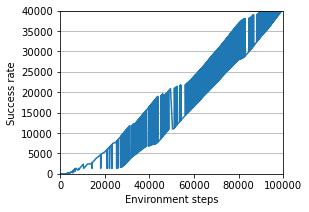

In [20]:
experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "ballbasket_cumulative/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "ballbasket_cumulative/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    }
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=False)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(0, 0.4e5)
#ax1.set_xticks(np.arange(0, 2e7+1, 4e6))
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("BallReachingTaskRewards.pdf", bbox_inches='tight')

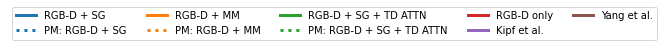

In [90]:
from matplotlib.lines import Line2D
cmap = plt.get_cmap("tab10")

custom_lines = [
    Line2D([0], [0], color=cmap(0), lw=3),
    Line2D([0], [0], color=cmap(0), lw=3, linestyle='dotted'),
    Line2D([0], [0], color=cmap(1), lw=3),
    Line2D([0], [0], color=cmap(1), lw=3, linestyle='dotted'),
    Line2D([0], [0], color=cmap(2), lw=3),
    Line2D([0], [0], color=cmap(2), lw=3, linestyle='dotted'),
    Line2D([0], [0], color=cmap(3), lw=3),
    Line2D([0], [0], color=cmap(4), lw=3),
    Line2D([0], [0], color=cmap(5), lw=3),
]

fig = plt.figure(figsize=(4,0.5))
ax = fig.add_subplot(111)
ax.set_axis_off()
#lines = ax.plot(data)
ax.legend(custom_lines, ['RGB-D + SG', 'PM: RGB-D + SG', 'RGB-D + MM', 'PM: RGB-D + MM', 'RGB-D + SG + TD ATTN',  'PM: RGB-D + SG + TD ATTN', 'RGB-D only', 'Kipf et al.', 'Yang et al.'], loc='lower left', ncol=5)
fig.savefig("/Users/michael/Downloads/f3_caption_new.pdf", bbox_inches='tight')

In [53]:
#table
experiments = [
    {
        "cat": "RGB-D only",
        "run": 1,
        "csv": "./rgb/search_rgb_10_success_mean.csv",
    },
    {
        "cat": "RGB-D only",
        "run": 2,
        "csv": "./rgb/relational_search_rgb_seed_1_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg/run-search_fixed_attention_no_preseed_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
        {
        "cat": "PM: RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg_preseed/run-relational_search_sg_all_no_goal_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg_preseed/run-relational_search_sg_preseed_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 1,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 2,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_2_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg_preseed/run-search_fixed_attention_mj_3_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg_preseed/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]

dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-100:].mean())
for exp in res:
    res[exp] = f"{np.mean(res[exp])} +/- {np.std(res[exp])}"
print(res)

{'RGB-D only': '0.5856999997794627 +/- 0.02050000295042992', 'RGB-D + SG (NO ATTN)': '0.4578500014543533 +/- 0.13574999928474427', 'RGB-D + MM': '0.5536999967694283 +/- 0.0254000023007393', 'RGB-D + SG (TD ATTN)': '0.8788500002026558 +/- 0.04875000387430195', 'PM: RGB-D + SG (NO ATTN)': '0.6346999989449977 +/- 0.10840000227093699', 'PM: RGB-D + MM': '0.6063999994099141 +/- 0.0670000045001507', 'PM: RGB-D + SG (TD ATTN)': '0.9209500014781952 +/- 0.005050002336502102'}


In [81]:
experiments = [
    {
        "cat": "RGB-D only",
        "run": 1,
        "csv": "./rgb/search_rgb_10_success_mean.csv",
    },
    {
        "cat": "RGB-D only",
        "run": 2,
        "csv": "./rgb/relational_search_rgb_seed_1_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg/run-search_fixed_attention_no_preseed_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 1,
        "csv": "./gcn/run-gcn_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 2,
        "csv": "./gcn/progress.csv",
    },
    {
        "cat": "Expanded representations",
        "run": 1,
        "csv": "./scene_priors/run-scene_priors_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "Expanded representations",
        "run": 2,
        "csv": "./scene_priors/run-scene_priors_seed0-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    
]
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-100:].mean())
for exp in res:
    res[exp] = f"{np.mean(res[exp])} +/- {np.std(res[exp])}"
print(res)

KeyError: 'Value'

In [80]:
spls = {
    "RGB-D only": [0.248, 0.370],
    "RGB-D + SG (NO ATTN)": [0.282, 0.08341491221023614],
    "RGB-D + SG (TD ATTN)": [0.536, 0.618],
    "RGB-D + MM": [0.248, 0.299],
    "PM: RGB-D + SG (NO ATTN)": [0.439, 0.366],
    "PM: RGB-D + SG (TD ATTN)": [0.783, 0.693],
    "PM: RGB-D + MM": [0.382, 0.427],
    "GCN": [0.290, 0.152894683152592],
    "Scene Priors": [0.028963960866901922,  0.03154651652791526],
    "choice_rgb": [0.216, 0.225],
    "choice_sg": [0.903, 1]
}

for exp, res in spls.items():
    print(f"{exp}\n{np.mean(res)}\n{np.std(res)}")

RGB-D only
0.309
0.061
RGB-D + SG (NO ATTN)
0.18270745610511807
0.09929254389488192
RGB-D + SG (TD ATTN)
0.577
0.04099999999999998
RGB-D + MM
0.27349999999999997
0.025499999999999995
PM: RGB-D + SG (NO ATTN)
0.40249999999999997
0.036500000000000005
PM: RGB-D + SG (TD ATTN)
0.738
0.04500000000000004
PM: RGB-D + MM
0.40449999999999997
0.022499999999999996
GCN
0.3325
0.04250000000000001
Scene Priors
0.03025523869740859
0.0012912778305066673
choice_rgb
0.2205
0.004500000000000004
choice_sg
0.9515
0.04849999999999999


In [82]:
x = [0.41, 0.39, 0.39, 0.37, 0.36, 0.39, 0.39, 0.38, 0.37, 0.35, 0.34, 0.34, 0.36, 0.37, 0.36, 0.34, 0.37, 0.39, 0.36, 0.37, 0.38, 0.38, 0.42, 0.41, 0.41]

In [85]:
np.mean(x)


0.37599999999999995

In [89]:
print(np.mean([0.3325, 0.513]))
print(np.std([0.3325, 0.513]))

0.42275
0.09025


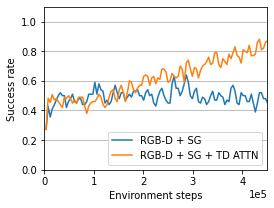

In [14]:
experiments = [
    #{
    #    "cat": "RGB-D + SG",
    #    "run": 2,
    #    "csv": "./choice_distractors/run-directed_search_hgt_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    #},
    {
        "cat": "RGB-D + SG",
        "run": 1,
        "csv": "./choice_distractors/run-directed_search_hgt_distractor_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 1,
        "csv": "./choice_distractors/run-directed_search_hfam_distractors_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },


]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True)
ax.set_xlim(0, 0.35e6+1e5)
ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/directed_nav_distractors.pdf", bbox_inches='tight')


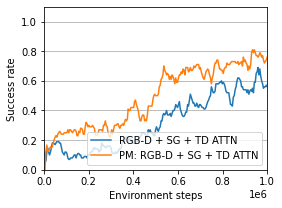

In [13]:
experiments = [
        {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./8_envs/run-hgt_fixed_attention_no_premap_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./8_envs/run-hgt_fixed_attention_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True)
ax.set_xlim(0, 0.9e6+1e5)
ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/exploratory_nav_8_envs.pdf", bbox_inches='tight')
